# Kaggle Competition Notebook

- Author: Haseebullah kehar 


**Survival Rate predicted by Neural Network in Tensorflow**

In [68]:
# Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

In [69]:
# Load the data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/gender_submission.csv')

In [70]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# **Let's explore the data df_train**

In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
(df_train.isnull().sum() / len(df_train) * 100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

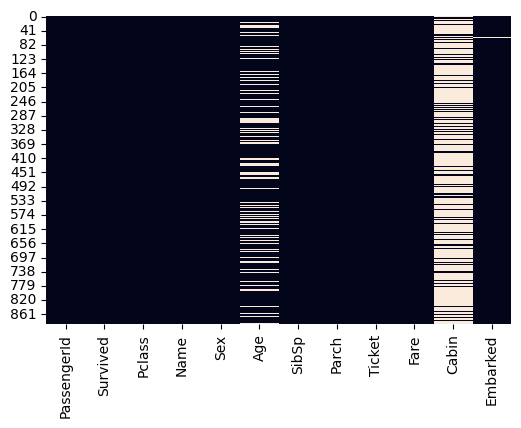

In [75]:
# plot the null values
plt.figure(figsize=(6, 4))
sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

In [76]:
# Imputing missing values
from sklearn.impute import SimpleImputer

# Impute 'Cabin' with 'Unknown'
df_train['Cabin'].fillna('Unknown', inplace=True)

# Impute 'Age' with the median
age_imputer = SimpleImputer(strategy='median')
df_train['Age'] = age_imputer.fit_transform(df_train[['Age']])

# Impute 'Embarked' with the most frequent category
embarked_imputer = SimpleImputer(strategy='most_frequent')
df_train['Embarked'] = embarked_imputer.fit_transform(df_train[['Embarked']])


In [77]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Missing values have been imputed successfully**

In [78]:
# check missing values for test dataset
# df_test.isnull().sum()

In [79]:
df = df_train.copy()

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'Survived' is the target column
# Split the data into X and y
X = df.drop(['Survived','Name'], axis=1)
y = df['Survived']

# Encode the data
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass 

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (712, 10)
X_test shape: (179, 10)
y_train shape: (712,)
y_test shape: (179,)


In [81]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,1,1,45.5,0,0,20,28.5000,56,2
733,734,2,1,23.0,0,0,228,13.0000,147,2
382,383,3,1,32.0,0,0,665,7.9250,147,2
704,705,3,1,26.0,1,0,398,7.8542,147,2
813,814,3,0,6.0,4,2,333,31.2750,147,2


**Create a Neural Network for Binary Classification**

In [82]:
!pip install tensorflow  


DEPRECATION: Loading egg at c:\python 3.11\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\PYTHON 3.11\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5593 - loss: 13.7900 - val_accuracy: 0.5866 - val_loss: 2.6590
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6013 - loss: 2.0129 - val_accuracy: 0.6648 - val_loss: 1.4977
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6490 - loss: 1.2190 - val_accuracy: 0.7151 - val_loss: 1.1083
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6846 - loss: 0.8376 - val_accuracy: 0.6313 - val_loss: 0.9516
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6743 - loss: 0.7791 - val_accuracy: 0.5251 - val_loss: 1.1171
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6500 - loss: 0.8096 - val_accuracy: 0.7374 - val_loss: 0.7553
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6966 - loss: 0.7699 - val_accuracy: 0.5754 - val_loss: 0.9995
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6834 - loss: 0.7917 - val_accuracy: 0.6983

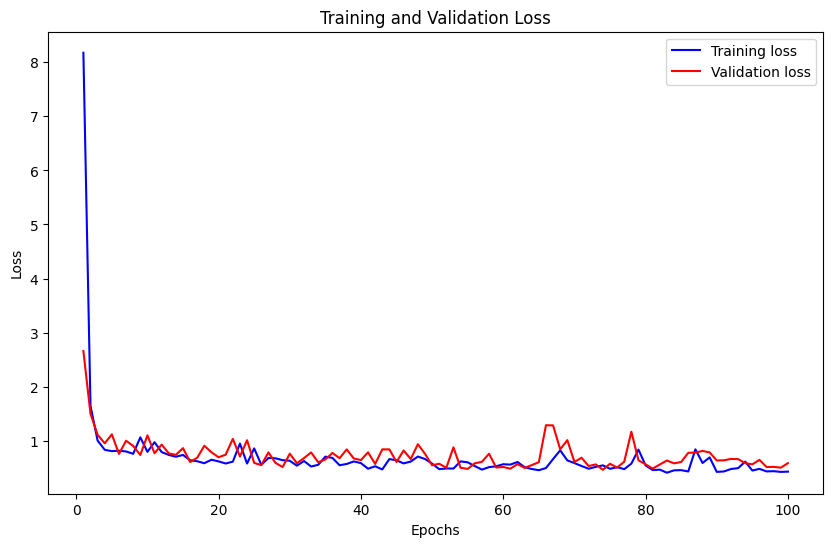

In [86]:
import tensorflow as tf 

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden Layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output Layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Evaluating the model on the test set
model.evaluate(X_test, y_test)

# Plotting the training and validation loss
# Extract loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create epochs array
epochs = range(1, len(train_loss) + 1)

# Plotting the loss
plt.figure(figsize=(10, 6))

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [88]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8223 - loss: 0.4202 - val_accuracy: 0.8182 - val_loss: 0.4703
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8296 - loss: 0.4464 - val_accuracy: 0.8462 - val_loss: 0.4297
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8181 - loss: 0.4229 - val_accuracy: 0.7622 - val_loss: 0.5111
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7985 - loss: 0.4234 - val_accuracy: 0.8042 - val_loss: 0.4723
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8044 - loss: 0.4102 - val_accuracy: 0.6923 - val_loss: 0.7012
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.7873 - loss: 0.5460 - val_accuracy: 0.7762 - val_loss: 0.4744
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7971 - loss: 0.4613 - val_accuracy: 0.8322 - val_loss: 0.4548
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8081 - loss: 0.3880 - val_accuracy: 0.

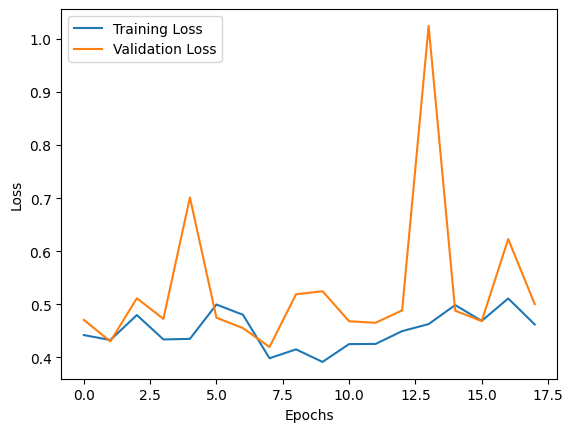

In [89]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
